In [38]:
# Import dependencies
import os
import sqlalchemy
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# vairables for login to postgres database
from config import db_password

db_user = "postgres"
db_host = "localhost"
db_port = 5432
db_name = "sql-challenge"


# create engine to connect to postgres database
engine = create_engine(f"postgresql://{db_user}:{'Pwd46999'}@{db_host}:{db_port}/{db_name}")
connection = engine.connect()


In [65]:
# bring salary information into pandas dataframe
salary = pd.read_sql_table("salaries",engine)
salary.head()


,emp_no,salary
0,10001,60117.0
1,10002,65828.0
2,10003,40006.0
3,10004,40054.0
4,10005,78228.0


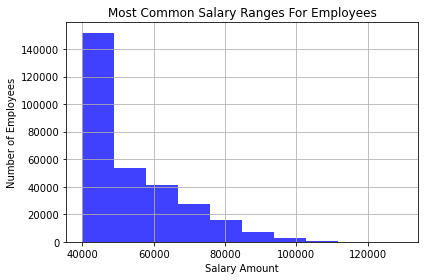

In [37]:
#create a bins  for plot
num_bins = 10

# Plot Histogram
x = salary["salary"]
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.75)

plt.xlabel('Salary $')
plt.ylabel('Frequency')
plt.title('Common Salary Ranges For Employees')
plt.grid()
plt.tight_layout()
plt.show()

In [64]:
# Reading the "employees" table into pandas
employees = pd.read_sql("SELECT * FROM \"employees\"", connection)
employees.head()


,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [66]:
# Reading the "titles" table into pandas
titles = pd.read_sql("SELECT * FROM \"titles\"", connection)
titles.head()

,title_id,title
0,﻿title_id,title
1,s0001,Staff
2,s0002,Senior Staff
3,e0001,Assistant Engineer
4,e0002,Engineer


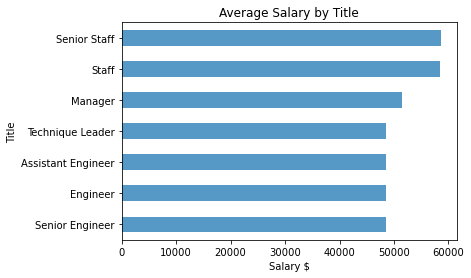

In [70]:
# Merge 3 tables (salaries, employees and title) to get salary by title
emp_w_salary = employees.merge(salary, on="emp_no")
merged = emp_w_salary.merge(titles, left_on="emp_title_id", right_on="title_id")

# Plot bar chart to show average salary by title
bar = merged[["title","salary"]].groupby("title").mean()
bar = bar.sort_values(by="salary", ascending=True)
chart2 = bar.plot.barh(legend=False, alpha=0.75)
chart2.set_title("Average Salary by Title")
chart2.set_xlabel("Salary $")
chart2.set_ylabel("Title")
plt.show()

In [71]:
# Epilogue
merged[merged["emp_no"]==499942]

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title_id,title
287532,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10,40000.0,e0004,Technique Leader
